# Dataset exploration of Neural Network by Jagers (2003).

Dataset exploration of dataset provided by Jagers.

Author of the notebook:
Antonio Magherini (Antonio.Magherini@deltares.nl).

In [1]:
# move to root directory

%cd .. 
%cd ..

c:\Users\Magherin\OneDrive - Stichting Deltares\Desktop\jamuna_morpho\benchmarks
c:\Users\Magherin\OneDrive - Stichting Deltares\Desktop\jamuna_morpho


In [2]:
# reload modules to avoid restarting the notebook every time these are updated

%load_ext autoreload
%autoreload 2

In [3]:
# import modules 

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np #type:ignore
import matplotlib.pyplot as plt #type:ignore
import netCDF4 as nc #type:ignore
import torch.nn as nn #type:ignore

from postprocessing.metrics import *
from benchmarks.jagers_nn.data_metrics_plots_nn import *

# Enable interactive widgets in Jupyter Notebook
%matplotlib inline
%matplotlib widget

Data directory. 

In [4]:
# Open a NetCDF file
dataset_path = r'data\jagers_nn\bsi_dump.nc'
dataset = nc.Dataset(dataset_path, mode='r')

print(dataset.dimensions.keys())  # list all dimensions
print(dataset.variables.keys())   # list all variables

dict_keys(['x', 'y'])
dict_keys(['x', 'y', 'var001', 'var002', 'var003', 'var004', 'var005', 'var006', 'var007', 'var008', 'var009', 'var010', 'var011', 'var012', 'var013', 'var014', 'var015', 'var016', 'var017', 'var018', 'var019', 'var020', 'var021'])


In [5]:
name_vars = dataset.variables # get name of variables
name_vars

{'x': <class 'netCDF4._netCDF4.Variable'>
 float64 x(x)
     standard_name: projection_x_coordinate
     units: m
 unlimited dimensions: 
 current shape = (350,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'y': <class 'netCDF4._netCDF4.Variable'>
 float64 y(y)
     standard_name: projection_y_coordinate
     units: m
 unlimited dimensions: 
 current shape = (675,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'var001': <class 'netCDF4._netCDF4.Variable'>
 float64 var001(x, y)
     long_name: AVG5555.BSI:  1 x distance to water right
 unlimited dimensions: 
 current shape = (350, 675)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'var002': <class 'netCDF4._netCDF4.Variable'>
 float64 var002(x, y)
     long_name: CHW.BSI:  1 skeleton nodes, channels, and endpoints
 unlimited dimensions: 
 current shape = (350, 675)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'var003': <class 'netCDF4._netCDF4.Variable'>
 float64 

In [6]:
# list dimensions and sizes
for dim_name, dim in dataset.dimensions.items():
    print(f"Dimension {dim_name}: size {len(dim)}")

# list variables and details
for var_name, var in dataset.variables.items():
    print(f"Variable {var_name}: shape {var.shape}, datatype {var.datatype}")

# global attributes (metadata)
print(dataset.__dict__)

Dimension x: size 350
Dimension y: size 675
Variable x: shape (350,), datatype float64
Variable y: shape (675,), datatype float64
Variable var001: shape (350, 675), datatype float64
Variable var002: shape (350, 675), datatype float64
Variable var003: shape (350, 675), datatype float64
Variable var004: shape (350, 675), datatype float64
Variable var005: shape (350, 675), datatype float64
Variable var006: shape (350, 675), datatype float64
Variable var007: shape (350, 675), datatype float64
Variable var008: shape (350, 675), datatype float64
Variable var009: shape (350, 675), datatype float64
Variable var010: shape (350, 675), datatype float64
Variable var011: shape (350, 675), datatype float64
Variable var012: shape (350, 675), datatype float64
Variable var013: shape (350, 675), datatype float64
Variable var014: shape (350, 675), datatype float64
Variable var015: shape (350, 675), datatype float64
Variable var016: shape (350, 675), datatype float64
Variable var017: shape (350, 675), dat

In [7]:
variables_tensor = load_ncd_tensor() # load tensor
inp_tar_pred_tensor = get_inp_tar_pred(variables_tensor) # get input, target, prediction

In [8]:
get_loss_metrics(inp_tar_pred_tensor)

Metrics using water threshold = 0.6:
BCE loss:          7.991e+00
Accuracy:          0.880
Precision:         0.572
Recall:            0.695
F1 score:          0.628
CSI score:         0.457


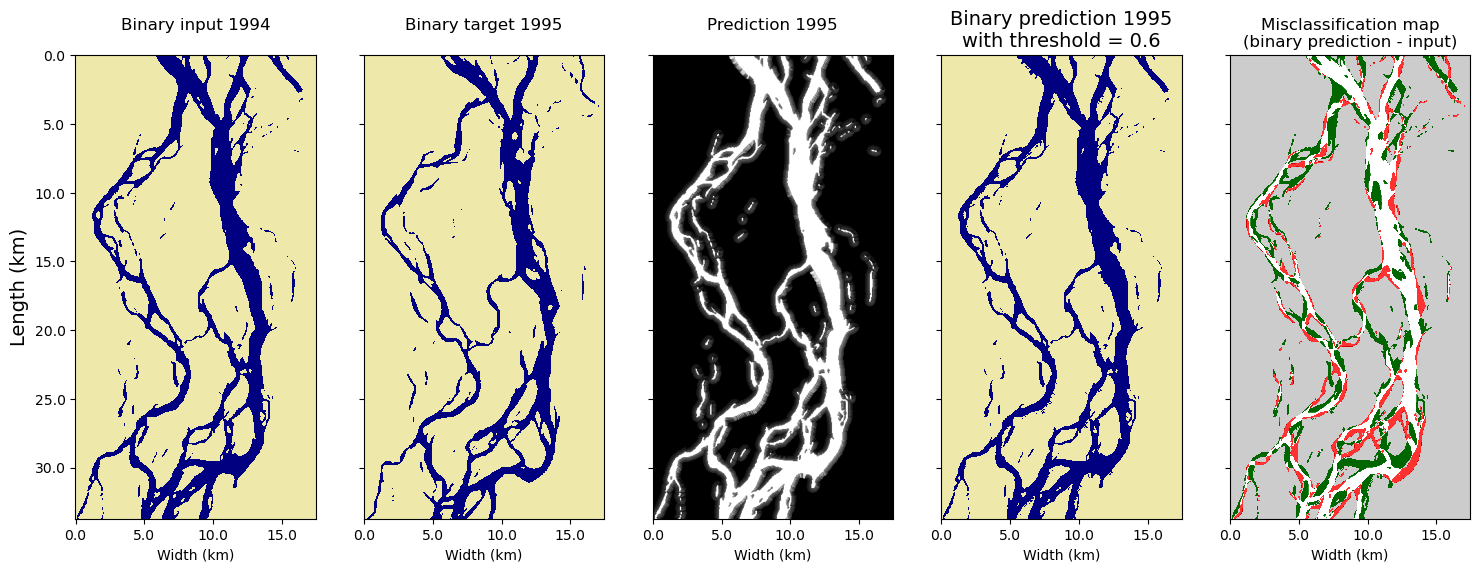

In [10]:
%matplotlib inline
plot_NN(input_target_pred=inp_tar_pred_tensor, save_img=True)

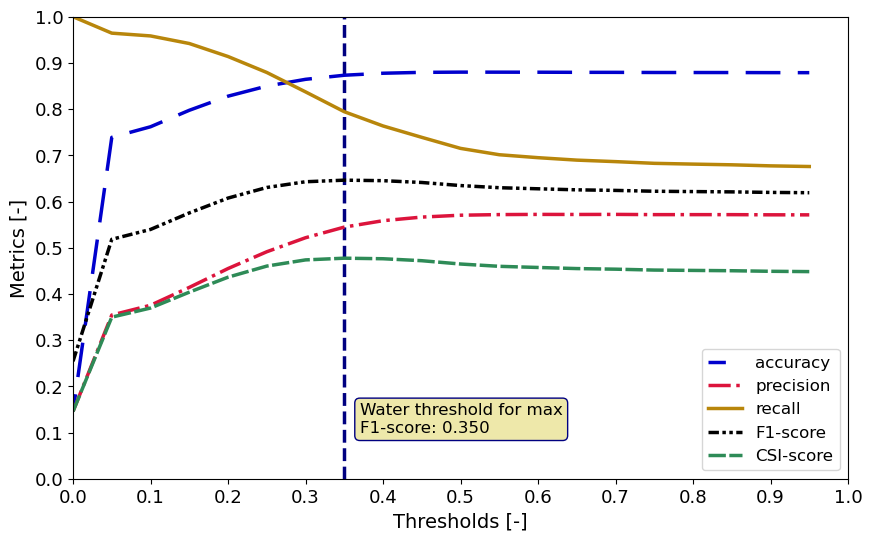

In [10]:
%matplotlib inline
metrics_thresholds(inp_tar_pred_tensor[2], inp_tar_pred_tensor[1], save_img=False)

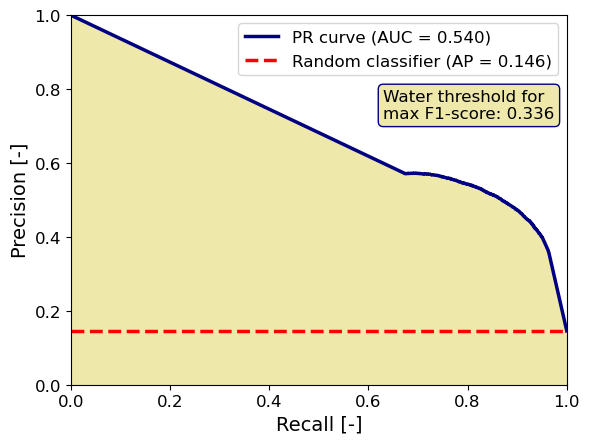

In [22]:
best_thr = pr_curve(inp_tar_pred_tensor[2], inp_tar_pred_tensor[1], save_img=False)

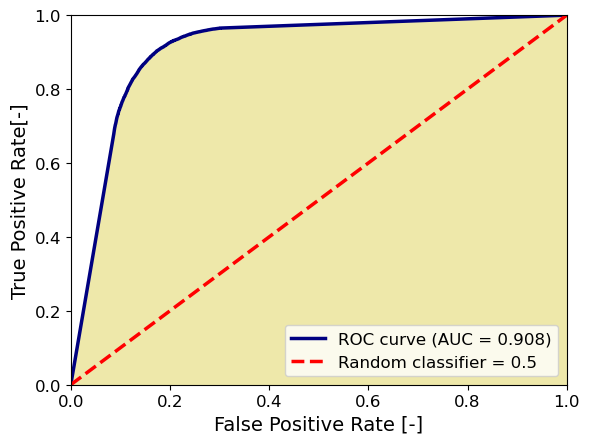

In [40]:
roc_curve(inp_tar_pred_tensor[2], inp_tar_pred_tensor[1], save_img=False)

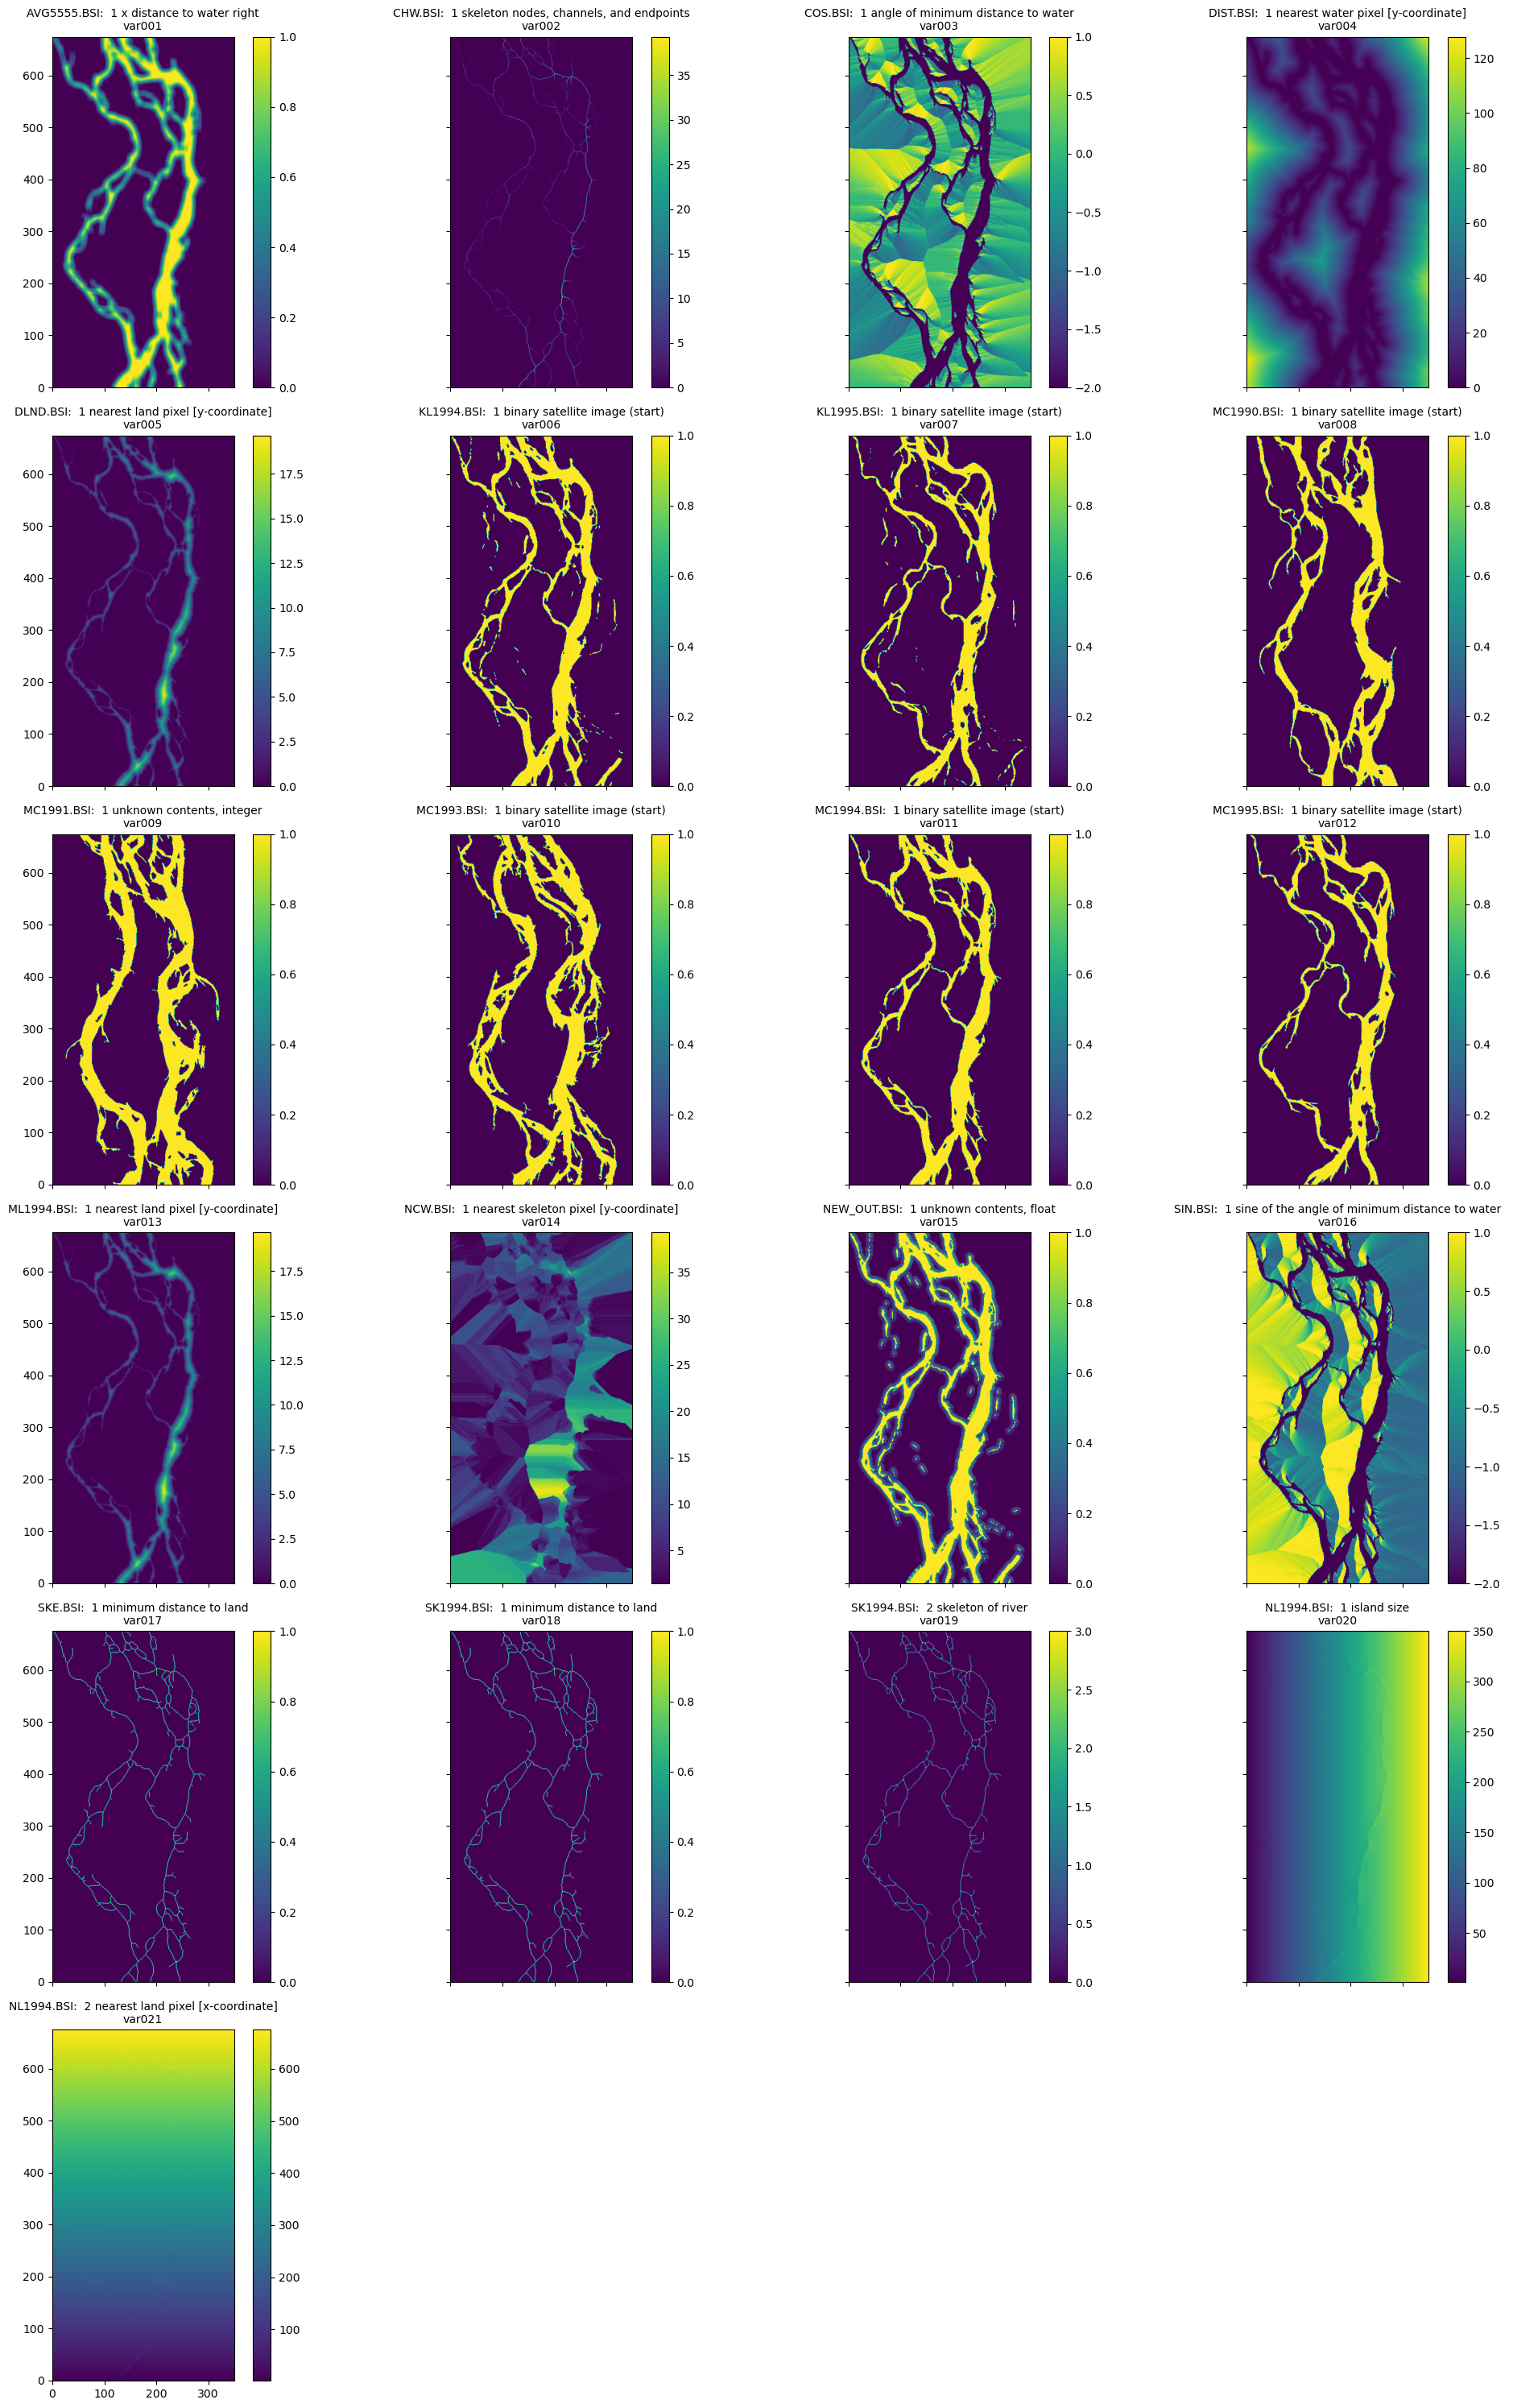

In [51]:
# plot all variables within dataset file

%matplotlib inline
plot_all_vars(dataset)